### **1. Problemas de Ruta Más Corta**

A continuación, se presentan los siguientes métodos de solución para resolver problemas de ruta más corta:

1. MÉTODO DEL VECINO MÁS CERCANO
2. ALGORITMO DE DIJKSTRA
3. ALGORITMO FLOYD WARSHALL
4. ALGORITMO DE CAMINOS MÁS CORTOS
5. ALGORITMO DE BÚSQUEDA A*

Para todos los casos utilizaremos las funciones del paquete [NetworkX](https://networkx.org/) de Python, excepto para el primer método, dado que en [NetworkX](https://networkx.org/) no hay una función integrada específica para el método del vecino más cercano (*Nearest Neighbor Method*) como parte de su API estándar. Sin embargo, implementamos este método manualmente utilizando las funciones y estructuras de datos proporcionadas por [NetworkX](https://networkx.org/).


**Concepto Clave**

**GRAFO:** Un grafo `G` es un par ordenado `G=(V,E)`, donde:
*   `V` es un conjunto de *vértices* o *nodos (`nodes`)*, y
*   `E` es un conjunto de *aristas* o *arcos (`edges`)*, que relacionan estos nodos.


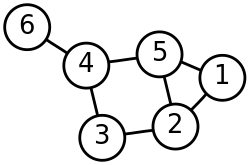

**Importar Librerías**

Inicialmente definimos las librerías necesarias para implementar los métodos anteriores.

In [1]:
# Importando algunas librerías que utilizaremos

# Networkx para grafos
import networkx as nx

# Mathplotlib
import matplotlib.pyplot as plt

# Numpy
import numpy as np

import sys
print(sys.executable)

/Users/macbookairm1/Documents/Universidad/Septimo Semestre/Modelos/Codigo/.venv/bin/python


**Crear Grafo**

Creamos el siguiente grafo `G` compuesto de 5 vértices y 10 aristas.

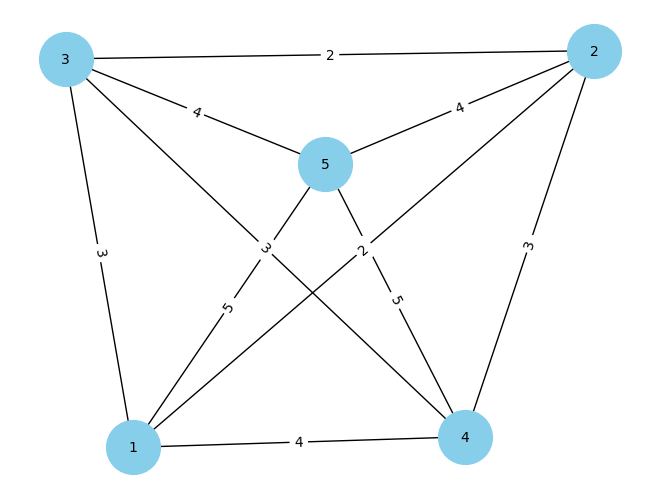

In [2]:
# Crear un grafo
G = nx.Graph() # Si es dirigido usar nx.DiGraph(), si es no dirigido usar nx.Graph()

# Agregar nodos
G.add_nodes_from([1, 2, 3, 4, 5])

# Agregar aristas con pesos
G.add_edge(1, 2, weight=2)
G.add_edge(1, 3, weight=3)
G.add_edge(1, 4, weight=4)
G.add_edge(1, 5, weight=5)
G.add_edge(2, 3, weight=2)
G.add_edge(2, 4, weight=3)
G.add_edge(2, 5, weight=4)
G.add_edge(3, 4, weight=3)
G.add_edge(3, 5, weight=4)
G.add_edge(4, 5, weight=5)

print("Grafo G creado con:")
print("Número de Vértices: ", nx.number_of_nodes(G))
print("Número de Aristas: ", nx.number_of_edges(G))

Grafo G creado con:
Número de Vértices:  5
Número de Aristas:  10


**MÉTODO DEL VECINO MÁS CERCANO**

Implementamos manualmente el *Nearest Neighbor Method* en la función llamada `nearest_neighbor`.

In [3]:
# Método del vecino más cercano
def nearest_neighbor(G, start):
    path = [start]
    while len(path) < len(G.nodes):
        current_node  = path[-1]
        next_node     = None
        min_weight    = float('inf')
        for neighbor in G.neighbors(current_node):
            if neighbor not in path:
                weight = G[current_node][neighbor]['weight']
                if weight < min_weight:
                    min_weight  = weight
                    next_node   = neighbor
        path.append(next_node)
    return path

# Obtener el camino más corto utilizando el método del vecino más cercano desde el nodo 1
shortest_path = nearest_neighbor(G, 1)
print("Camino más corto:", shortest_path)

Camino más corto: [1, 2, 3, 4, 5]


**Mostrar Grafo Solución**

Presentamos el camino más corto en el grafo `G`.

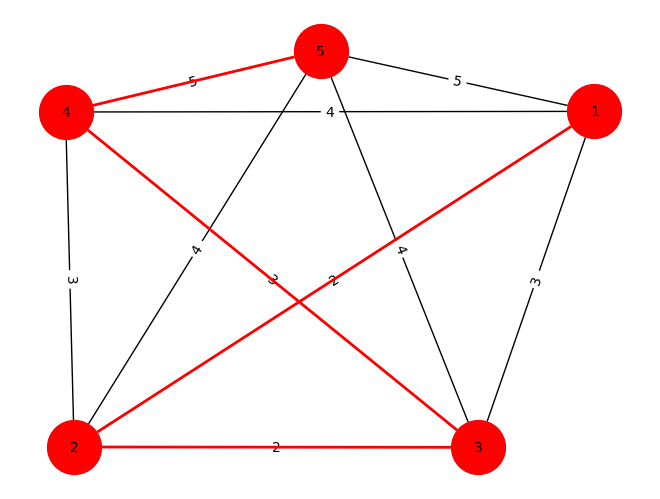

In [4]:
# Dibujar el grafo
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=1500, edge_color='black', linewidths=1, font_size=10)

# Obtener los pesos de los arcos
edge_labels = nx.get_edge_attributes(G, 'weight')

# Dibujar las etiquetas de los arcos
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Dibujar el camino más corto
path_edges = list(zip(shortest_path[:-1], shortest_path[1:]))
nx.draw_networkx_nodes(G, pos, nodelist=shortest_path, node_color='r', node_size=1500)
nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='r', width=2)
plt.show()


**ALGORITMO DE DIJKSTRA**

 Utilizamos la función `dijkstra_path` de `NetworkX` para calcular la ruta más corta entre los vértices `1` a `5` en el grafo `G`.

In [5]:
dijkstra_path = nx.dijkstra_path(G, 1, 5)
print("Ruta más corta:", dijkstra_path)

Ruta más corta: [1, 5]


**ALGORITMO FLOYD WARSHALL**

 Utilizamos la función `floyd_warshall_numpy` de `NetworkX` para calcular la matriz de distancias mínimas entre todos los vértices en el grafo `G`.

In [ ]:
# Calcular la matriz de distancias mínimas utilizando el algoritmo de Floyd-Warshall
dist_matrix = nx.floyd_warshall_numpy(G)

# Imprimir la matriz de distancias mínimas
print("Matriz de distancias mínimas del grafo G:")
print(dist_matrix)

**ALGORITMO DE CAMINOS MÁS CORTOS**

 Utilizamos la función `shortest_path` de `NetworkX` para calcular la ruta más corta entre los vértices `1` a `5` en el grafo `G`.

In [ ]:
shortest_path = nx.shortest_path(G, 1, 5)
print("Ruta más corta:", shortest_path)

**ALGORITMO DE BÚSQUEDA A***

 Utilizamos la función `astar_path` de `NetworkX` para calcular la ruta más corta entre los vértices `1` a `5` en el grafo `G`.

In [ ]:
astar_path = nx.astar_path(G, 1, 5)
print("Ruta más corta:", astar_path)

### **2. Ruta Más Corta Metro de la CDMX**

A continuación, analizaremos como resolver problemas de rutas más cortas en el [metro de la ciudad de México](https://metro-mx.com/mapa/). Para esto, utilizaremos las funciones del paquete [NetworkX](https://networkx.org/) de Python.



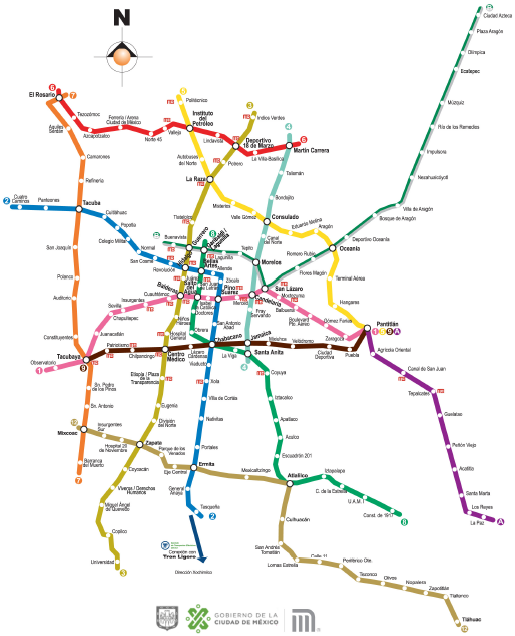


**Problema de Ruta Más Corta**

Suponga que vive en la estación BALBUENA (línea 1) y debe dirigirse a la estación UNIVERSIDAD (línea 3). Encontrar la Ruta Más Corta entre estas estaciones del metro de la CDMX.

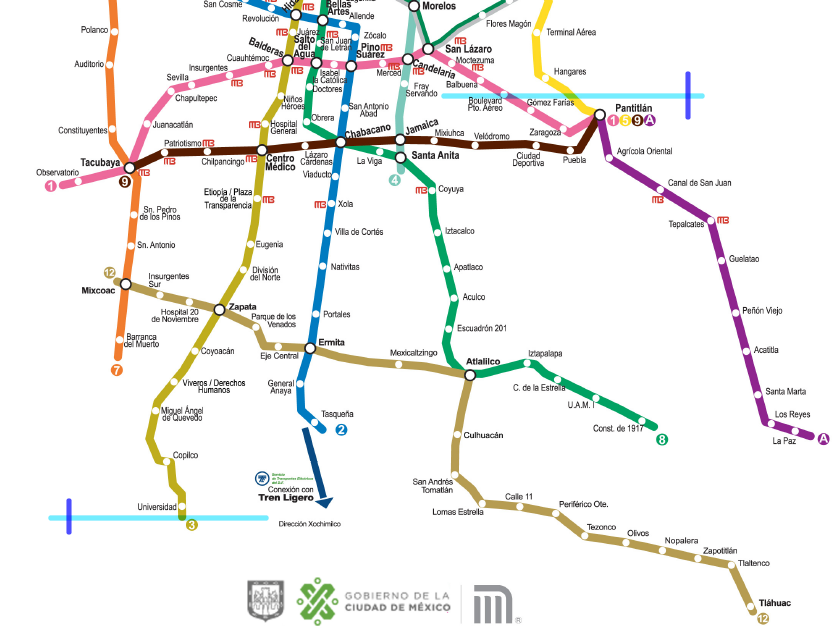

**Importar Librerías**

Inicialmente definimos las librerías necesarias para implementar los métodos anteriores.

In [6]:
# Importando algunas librerías que utilizaremos

# Networkx para grafos
import networkx as nx

# Pandas
import pandas as pd

# Numpy
import numpy as np

# Mathplotlib
import matplotlib.pyplot as plt

**Importar Datos**

Importamos los datos desde GOOGLE DRIVE.

In [ ]:
# Importar archivos de GOOGLE DRIVE
# from google.colab import files
#from google.colab import drive
# drive.mount('/content/drive')

Establecemos la ruta de los datos a analizar.

In [7]:
# Ruta de los datos
df = pd.read_excel("Metro-CDMX.xlsx")

# Dimensión del Data Frame
df.shape

(183, 3)

Observamos una vista preliminar de los datos importados.

In [8]:
# Validamos que los datos se importaron correctamente
df.head()

,Origen,Destino,Longitud de interestación
0,Pantitlán,Zaragoza,1320
1,Zaragoza,Gómez Farías,762
2,Gómez Farías,Boulevard Puerto Aéreo,611
3,Boulevard Puerto Aéreo,Balbuena,595
4,Balbuena,Moctezuma,703


**Crear Grafo**

Creamos el grafo `METRO` y lo mostramos.

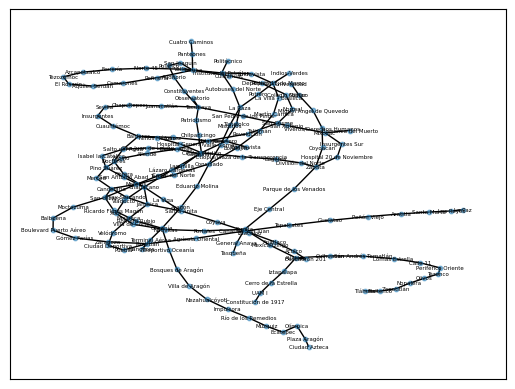

In [9]:
# Diseñamos el grafo METRO
METRO = nx.from_pandas_edgelist(df,source='Origen',target='Destino',edge_attr='Longitud de interestación')

# Mostramos el grafo METRO
pos = nx.spring_layout(METRO)
nx.draw_networkx_nodes(METRO, pos, node_size=10, alpha=0.5)
nx.draw_networkx_edges(METRO, pos)
nx.draw_networkx_labels(METRO, pos, labels=None, font_size=4)
plt.show()

**ALGORITMO DE DIJKSTRA**

 Utilizamos la función `dijkstra_path` de `NetworkX` para calcular la ruta más corta entre los vértices `Balbuena` a `Universidad` en el grafo `METRO`.

In [10]:
djk_path= nx.dijkstra_path(METRO, source='Balbuena', target='Universidad', weight='Longitud de interestación')
djk_path

['Balbuena',
 'Moctezuma',
 'San Lázaro',
 'Candelaria',
 'Merced',
 'Pino Suárez',
 'Isabel la Católica',
 'Salto del Agua',
 'Balderas',
 'Niños Héroes',
 'Hospital General',
 'Centro Médico',
 'Etiopía/Plaza de la Transparencia',
 'Eugenia',
 'División del Norte',
 'Zapata',
 'Coyoacán',
 'Viveros/Derechos Humanos',
 'Miguel Ángel de Quevedo',
 'Copilco',
 'Universidad']

**Mostrar Grafo Solución**

Presentamos el camino más corto en el grafo `METRO`, así como los *kilometros* y las *estaciones* a recorrer para llegar a la estación destino.

Debemos recorrer las siguientes estaciones:  21
Debemos recorrer los siguientes kilometros:  15716


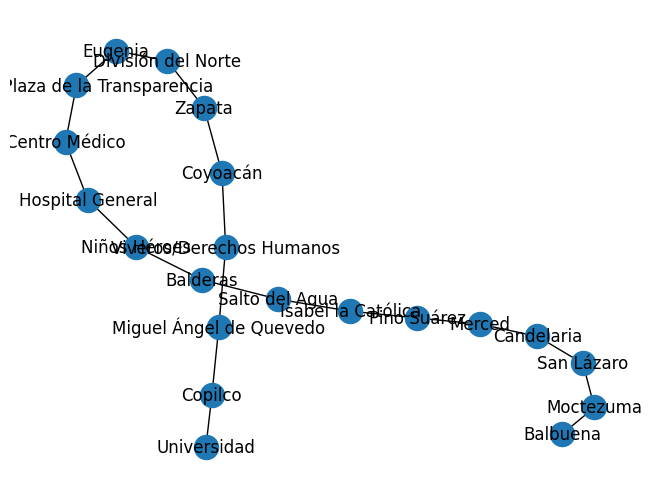

In [11]:
print("Debemos recorrer las siguientes estaciones: ", len(djk_path))

djk_path_kms = nx.dijkstra_path_length(METRO, 'Balbuena', 'Universidad', 'Longitud de interestación')
print("Debemos recorrer los siguientes kilometros: ", djk_path_kms)

# Graficamos la solución
Ruta1= METRO.subgraph(djk_path)
nx.draw(Ruta1, with_labels=True)
